In [1]:
!pip install geopandas 

In [2]:
import pandas as pd
import mysql.connector
from mysql.connector import Error
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point
import plotly.express as pt

## Creating a connection between MySQL and Python Notebook

In [3]:
def mysqltodf(df):
    try:
        sqlconnect=mysql.connector.connect(
        host='localhost',
        user='root',
        password='Harushika123@',
        database='listing',
        charset='utf8',
        auth_plugin='mysql_native_password')
        hand=sqlconnect.cursor()
        query='select * from sql_prt'
        hand.execute(query)
        record=hand.fetchall()
        n=hand.rowcount
        for i in range(n):
            df.loc[i]=record[i]
        print(df)
        hand.close()
    except Error as e:
        print('MySql Error is =',e)
    finally:
        if sqlconnect.is_connected():
            sqlconnect.close()
            return df

In [4]:
dict={}

In [5]:
df=pd.DataFrame(columns=['id','name','host_id','host_name','neighbourhood_group','neighbourhood','latitude','longitude','room_type','price','minimum_nights','number_of_reviews','last_review','reviews_per_month','calculated_host_listings_count','availability_365'])

In [6]:
df=mysqltodf(df)

         id                                              name host_id  \
0      2539                Clean & quiet apt home by the park    2787   
1      2595                             Skylit Midtown Castle    2845   
2      3647               THE VILLAGE OF HARLEM....NEW YORK !    4632   
3      3831                   Cozy Entire Floor of Brownstone    4869   
4      5022  Entire Apt: Spacious Studio/Loft by central park    7192   
..      ...                                               ...     ...   
495  174527              Cozy private family home in Bushwick  833926   
496  174966             Luxury 2Bed/2.5Bath Central Park View  836168   
497  176135               Cosy Sunny 1brm in Prospect Heights  842125   
498  176653                    East Village bedroom w rooftop  844862   
499    None                                              None    None   

       host_name neighbourhood_group    neighbourhood  latitude  longitude  \
0           John            Brooklyn       Ke

In [7]:
df.to_excel('listing.xlsx')

In [8]:
df=pd.read_excel(r"C:\Users\Dhruv\listing.xlsx")

In [9]:
df.head()

,Unnamed: 0,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,0,2539.0,Clean & quiet apt home by the park,2787.0,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149.0,1.0,9.0,2018-10-19,0.21,6.0,365.0
1,1,2595.0,Skylit Midtown Castle,2845.0,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225.0,1.0,45.0,2019-05-21,0.38,2.0,355.0
2,2,3647.0,THE VILLAGE OF HARLEM....NEW YORK !,4632.0,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150.0,3.0,0.0,NaT,NaN,1.0,365.0
3,3,3831.0,Cozy Entire Floor of Brownstone,4869.0,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89.0,1.0,270.0,2019-07-05,4.64,1.0,194.0
4,4,5022.0,Entire Apt: Spacious Studio/Loft by central park,7192.0,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80.0,10.0,9.0,2018-11-19,0.10,1.0,0.0


In [10]:
df.drop(columns='Unnamed: 0',inplace=True)

In [11]:
df.drop(index=499,inplace=True)

In [12]:
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539.0,Clean & quiet apt home by the park,2787.0,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149.0,1.0,9.0,2018-10-19,0.21,6.0,365.0
1,2595.0,Skylit Midtown Castle,2845.0,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225.0,1.0,45.0,2019-05-21,0.38,2.0,355.0
2,3647.0,THE VILLAGE OF HARLEM....NEW YORK !,4632.0,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150.0,3.0,0.0,NaT,NaN,1.0,365.0
3,3831.0,Cozy Entire Floor of Brownstone,4869.0,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89.0,1.0,270.0,2019-07-05,4.64,1.0,194.0
4,5022.0,Entire Apt: Spacious Studio/Loft by central park,7192.0,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80.0,10.0,9.0,2018-11-19,0.10,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,173742.0,"Elegant 2-BR duplex, Union Square",829652.0,Donna,Manhattan,Gramercy,40.73476,-73.98452,Entire home/apt,400.0,2.0,105.0,2019-06-23,1.13,1.0,304.0
495,174527.0,Cozy private family home in Bushwick,833926.0,Kris,Brooklyn,Bushwick,40.69055,-73.92357,Entire home/apt,150.0,2.0,11.0,2018-10-28,0.46,1.0,0.0
496,174966.0,Luxury 2Bed/2.5Bath Central Park View,836168.0,Henry,Manhattan,Upper West Side,40.77350,-73.98697,Entire home/apt,2000.0,30.0,30.0,2018-05-05,0.33,11.0,0.0
497,176135.0,Cosy Sunny 1brm in Prospect Heights,842125.0,Jennifer,Brooklyn,Crown Heights,40.67505,-73.95969,Entire home/apt,97.0,3.0,31.0,2018-10-23,0.32,1.0,193.0


In [13]:
df.shape

(499, 16)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              499 non-null    float64       
 1   name                            499 non-null    object        
 2   host_id                         499 non-null    float64       
 3   host_name                       498 non-null    object        
 4   neighbourhood_group             499 non-null    object        
 5   neighbourhood                   499 non-null    object        
 6   latitude                        499 non-null    float64       
 7   longitude                       499 non-null    float64       
 8   room_type                       499 non-null    object        
 9   price                           499 non-null    float64       
 10  minimum_nights                  499 non-null    float64       
 11  number

In [15]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,499.000000,4.990000e+02,499.000000,499.000000,499.000000,499.000000,499.000000,481.000000,499.000000,499.000000
mean,72188.370741,3.215084e+05,40.729359,-73.963020,152.246493,8.006012,94.695391,1.041040,2.088176,183.468938
std,50836.727369,3.980130e+05,0.051596,0.032083,127.088486,16.406298,99.081380,1.028705,3.174358,128.700255
min,2539.000000,2.787000e+03,40.586150,-74.085460,33.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,28358.500000,7.574200e+04,40.686625,-73.984115,85.000000,2.000000,19.000000,0.270000,1.000000,42.500000
50%,62452.000000,2.561610e+05,40.721850,-73.962180,125.000000,3.000000,54.000000,0.680000,1.000000,209.000000
75%,111419.500000,4.525320e+05,40.759255,-73.948010,187.000000,5.000000,145.000000,1.570000,2.000000,297.000000
max,176653.000000,6.197784e+06,40.897470,-73.761330,2000.000000,200.000000,480.000000,6.700000,28.000000,365.000000


### Null Values

In [16]:
df.isna().sum()

id                                 0
name                               0
host_id                            0
host_name                          1
neighbourhood_group                0
neighbourhood                      0
latitude                           0
longitude                          0
room_type                          0
price                              0
minimum_nights                     0
number_of_reviews                  0
last_review                       18
reviews_per_month                 18
calculated_host_listings_count     0
availability_365                   0
dtype: int64

### Incorrect values

In [17]:
x=df[(df['availability_365']==0) & (df['minimum_nights']==1)]
x

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
88,20300.0,Great Location for NYC,76627.0,Pas,Manhattan,East Village,40.72912,-73.98057,Private room,50.0,1.0,2.0,2016-02-14,0.05,1.0,0.0
375,112304.0,Cozy Private Room in West Harlem!,573316.0,Kelli,Manhattan,Harlem,40.80540,-73.95189,Private room,90.0,1.0,1.0,2016-01-02,0.02,1.0,0.0
399,126816.0,Gorgeous Upper West Side Apartment,620288.0,Eric,Manhattan,Upper West Side,40.79918,-73.96607,Private room,85.0,1.0,3.0,2014-11-06,0.03,1.0,0.0
423,144148.0,1 Bdrm in 4 Bdrm dupelx/roof deck,299755.0,Jonathan,Manhattan,East Village,40.72217,-73.98419,Private room,96.0,1.0,34.0,2016-01-05,0.58,1.0,0.0


In [18]:
df.drop(index=x.index,inplace=True)

### Missing Values

In [19]:
df.tail(50)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
449,158290.0,Clinton Hill + Free Coffee = #smile,759583.0,Pepe,Brooklyn,Clinton Hill,40.68288,-73.96024,Private room,75.0,3.0,43.0,2019-05-20,0.44,2.0,365.0
450,158913.0,"Nice, cozy, neat apt Greenpoint,BK",762563.0,Lennny & Megan,Brooklyn,Greenpoint,40.72489,-73.95494,Entire home/apt,130.0,5.0,4.0,2015-03-13,0.05,1.0,0.0
451,158955.0,PRIVATE and SUNNY Williamsburg Apt!,465589.0,Amia,Brooklyn,Williamsburg,40.70867,-73.94284,Entire home/apt,139.0,2.0,385.0,2019-06-29,4.00,1.0,222.0
452,159749.0,Purple Room for 2/3 in brownstone $1450 per month,54275.0,JT And Tiziana,Brooklyn,Bedford-Stuyvesant,40.67963,-73.93908,Private room,88.0,1.0,64.0,2019-07-01,0.68,3.0,238.0
453,159815.0,Red Room for two in Brownstone for $1355/mo,54275.0,JT And Tiziana,Brooklyn,Bedford-Stuyvesant,40.67980,-73.93908,Private room,80.0,1.0,39.0,2019-06-24,0.41,3.0,218.0
454,159913.0,"Chelsea living, 2BR best location",759883.0,Kaye,Manhattan,Chelsea,40.74346,-73.99882,Private room,150.0,2.0,37.0,2019-07-03,1.79,1.0,0.0
455,160609.0,LOCATION LOCATION LOCATION UWS 60's,769247.0,Ligia,Manhattan,Upper West Side,40.77724,-73.98109,Entire home/apt,200.0,3.0,10.0,2019-01-01,0.12,1.0,0.0
456,160994.0,In the heart of East Village,770831.0,James,Manhattan,East Village,40.72972,-73.97995,Entire home/apt,200.0,2.0,103.0,2019-06-24,1.08,1.0,235.0
457,161366.0,Sunny 15min to Manhattan LADY only,733894.0,Lucy,Queens,Sunnyside,40.74102,-73.91681,Private room,42.0,40.0,41.0,2019-06-01,0.43,3.0,246.0
458,161394.0,Surfer room 15mins to downtown NYC!,772300.0,Alain,Brooklyn,Williamsburg,40.71309,-73.94128,Private room,90.0,6.0,3.0,2014-08-31,0.03,1.0,0.0


In [20]:
df.head(50)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539.0,Clean & quiet apt home by the park,2787.0,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149.0,1.0,9.0,2018-10-19,0.21,6.0,365.0
1,2595.0,Skylit Midtown Castle,2845.0,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225.0,1.0,45.0,2019-05-21,0.38,2.0,355.0
2,3647.0,THE VILLAGE OF HARLEM....NEW YORK !,4632.0,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150.0,3.0,0.0,NaT,NaN,1.0,365.0
3,3831.0,Cozy Entire Floor of Brownstone,4869.0,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89.0,1.0,270.0,2019-07-05,4.64,1.0,194.0
4,5022.0,Entire Apt: Spacious Studio/Loft by central park,7192.0,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80.0,10.0,9.0,2018-11-19,0.10,1.0,0.0
5,5099.0,Large Cozy 1 BR Apartment In Midtown East,7322.0,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200.0,3.0,74.0,2019-06-22,0.59,1.0,129.0
6,5121.0,BlissArtsSpace!,7356.0,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60.0,45.0,49.0,2017-10-05,0.40,1.0,0.0
7,5178.0,Large Furnished Room Near B'way,8967.0,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79.0,2.0,430.0,2019-06-24,3.47,1.0,220.0
8,5203.0,Cozy Clean Guest Room - Family Apt,7490.0,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79.0,2.0,118.0,2017-07-21,0.99,1.0,0.0
9,5238.0,Cute & Cozy Lower East Side 1 bdrm,7549.0,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150.0,1.0,160.0,2019-06-09,1.33,4.0,188.0


### Duplicate Values

In [21]:
df[df.duplicated()]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365


## Exploratory Data Analysis (EDA)

In [22]:
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539.0,Clean & quiet apt home by the park,2787.0,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149.0,1.0,9.0,2018-10-19,0.21,6.0,365.0
1,2595.0,Skylit Midtown Castle,2845.0,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225.0,1.0,45.0,2019-05-21,0.38,2.0,355.0
2,3647.0,THE VILLAGE OF HARLEM....NEW YORK !,4632.0,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150.0,3.0,0.0,NaT,NaN,1.0,365.0
3,3831.0,Cozy Entire Floor of Brownstone,4869.0,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89.0,1.0,270.0,2019-07-05,4.64,1.0,194.0
4,5022.0,Entire Apt: Spacious Studio/Loft by central park,7192.0,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80.0,10.0,9.0,2018-11-19,0.10,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,173742.0,"Elegant 2-BR duplex, Union Square",829652.0,Donna,Manhattan,Gramercy,40.73476,-73.98452,Entire home/apt,400.0,2.0,105.0,2019-06-23,1.13,1.0,304.0
495,174527.0,Cozy private family home in Bushwick,833926.0,Kris,Brooklyn,Bushwick,40.69055,-73.92357,Entire home/apt,150.0,2.0,11.0,2018-10-28,0.46,1.0,0.0
496,174966.0,Luxury 2Bed/2.5Bath Central Park View,836168.0,Henry,Manhattan,Upper West Side,40.77350,-73.98697,Entire home/apt,2000.0,30.0,30.0,2018-05-05,0.33,11.0,0.0
497,176135.0,Cosy Sunny 1brm in Prospect Heights,842125.0,Jennifer,Brooklyn,Crown Heights,40.67505,-73.95969,Entire home/apt,97.0,3.0,31.0,2018-10-23,0.32,1.0,193.0


<AxesSubplot:>

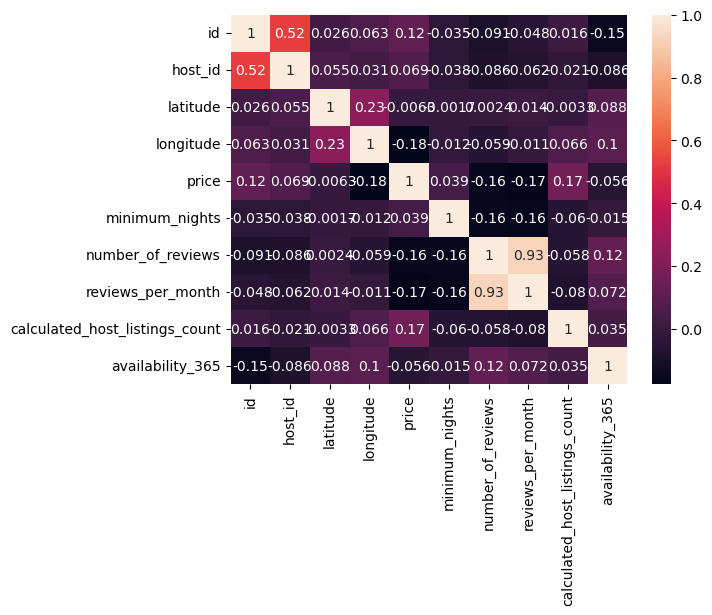

In [23]:
sns.heatmap(data=df.corr(),annot=True)

In [24]:
df1=df[df['calculated_host_listings_count']>2]

In [25]:
print('Number of hosts with more than 1 Listing =',len(df1))

Number of hosts with more than 1 Listing = 98


In [26]:
t=df.groupby('neighbourhood_group')['price'].mean().sort_values()
t

neighbourhood_group
Staten Island     43.200000
Bronx             69.142857
Queens           112.454545
Brooklyn         147.631356
Manhattan        167.266667
Name: price, dtype: float64

In [27]:
x=t.keys()
y=t.values

C:\Users\Dhruv\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


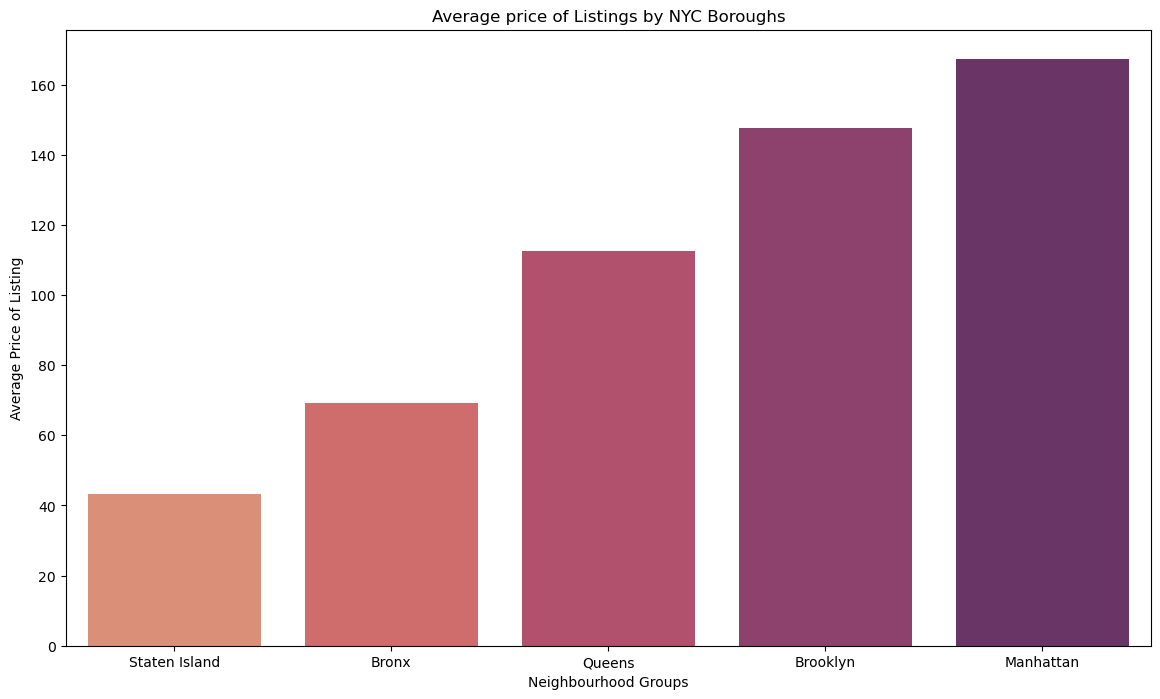

In [28]:
plt.figure(figsize=(14,8))
sns.barplot(x,y,palette='flare')
plt.title('Average price of Listings by NYC Boroughs')
plt.xlabel('Neighbourhood Groups')
plt.ylabel('Average Price of Listing')
plt.show()

#### Manhattan is the most expensive Neighbourhood Group when it comes to average price of listing in the area while staten Island and Bronx are on the cheaper side.

#### Below shown are the most expensive and most cheapest neighbourhood to book

In [29]:
neighbourhood=df.groupby('neighbourhood')['price'].mean().sort_values(ascending=False).head(10)
neighbourhood

neighbourhood
Gramercy             400.000000
Brooklyn Heights     312.500000
Flatiron District    305.000000
Nolita               275.000000
SoHo                 273.333333
Carroll Gardens      271.666667
Little Italy         266.666667
DUMBO                250.000000
Boerum Hill          243.333333
Upper West Side      235.043478
Name: price, dtype: float64

In [30]:
x=neighbourhood.keys()
y=neighbourhood.values

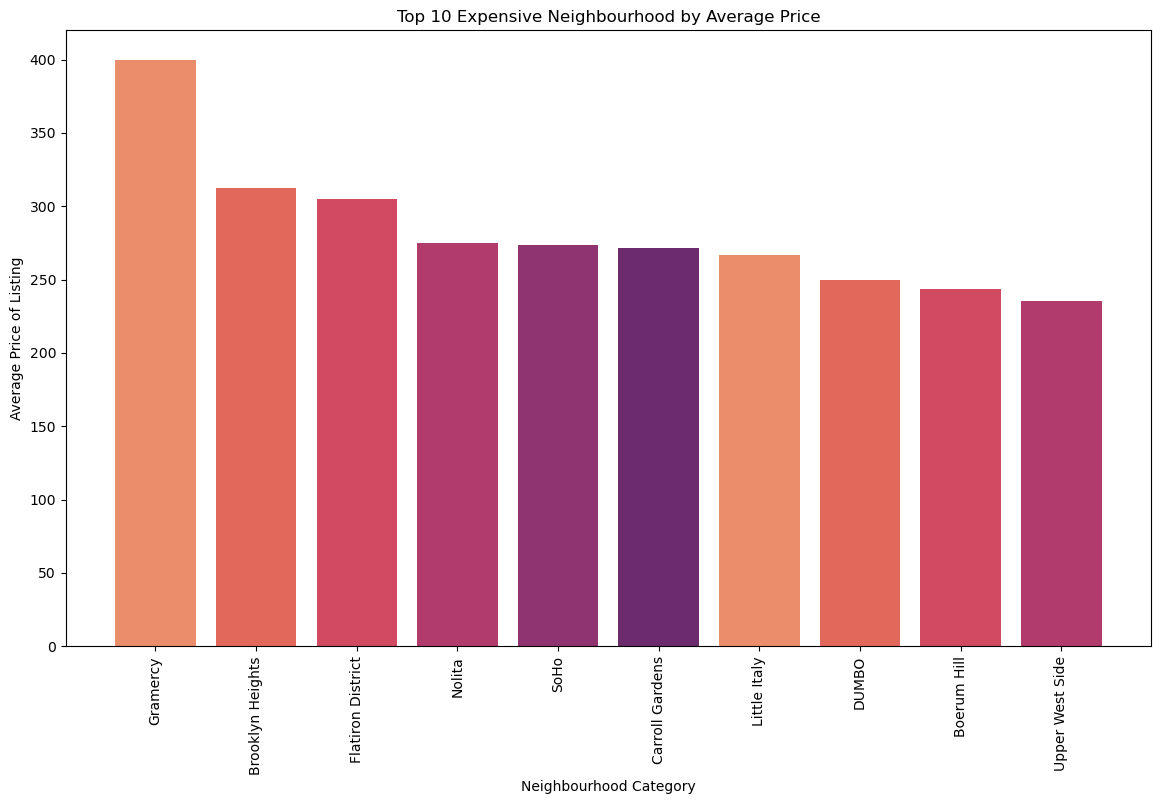

In [31]:
plt.figure(figsize=(14,8))
palette_color = sns.color_palette('flare')
plt.bar(x,y,color=palette_color)
plt.xticks(x,rotation='vertical')
plt.title('Top 10 Expensive Neighbourhood by Average Price')
plt.xlabel('Neighbourhood Category')
plt.ylabel('Average Price of Listing')
plt.show()

In [32]:
neighbourhood=df.groupby('neighbourhood')['price'].mean().sort_values(ascending=True).head(10)
neighbourhood

neighbourhood
Tompkinsville         36.5
University Heights    37.0
Highbridge            42.5
Sunnyside             49.0
Queens Village        50.0
Jamaica               55.0
East Flatbush         57.5
St. George            70.0
Rockaway Beach        70.0
Woodside              70.0
Name: price, dtype: float64

In [33]:
x=neighbourhood.keys()
y=neighbourhood.values

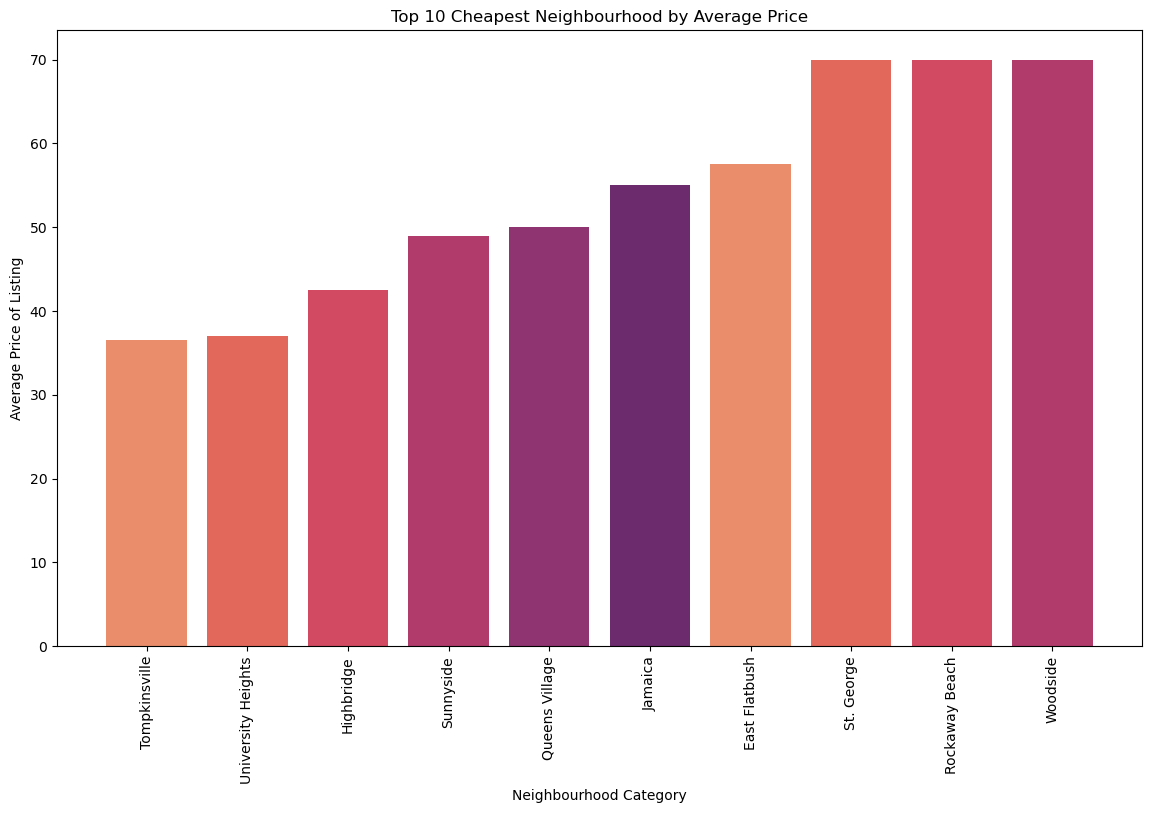

In [34]:
plt.figure(figsize=(14,8))
plt.bar(x,y,color=palette_color)
plt.xticks(x,rotation='vertical')
plt.title('Top 10 Cheapest Neighbourhood by Average Price')
plt.xlabel('Neighbourhood Category')
plt.ylabel('Average Price of Listing')
plt.show()

In [35]:
p=df.groupby('room_type')['price'].count()
p

room_type
Entire home/apt    290
Private room       201
Shared room          4
Name: price, dtype: int64

### The below Pie chart shows the distribution of listing by room type as shows that around 60% of the listing are for entire home/apt while less than 1% of the listings are for shared rooms as people prefer privacy against being economical.

In [36]:
x=p.keys()
y=p.values

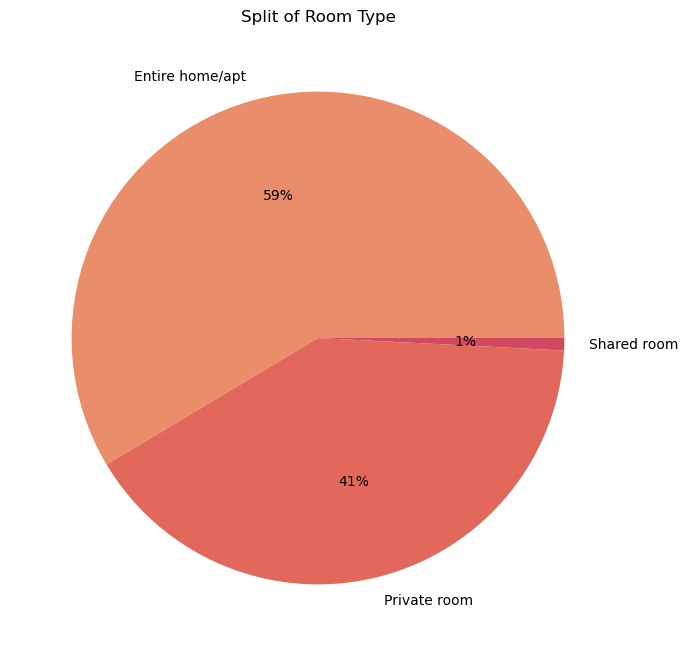

In [37]:
plt.figure(figsize=(14,8))
palette_color = sns.color_palette('flare')
plt.pie(y,labels=x,colors=palette_color, autopct='%.0f%%')
plt.title('Split of Room Type')
plt.show()

In [38]:
q=df.groupby('room_type')['price'].mean().sort_values()
q

room_type
Shared room         64.750000
Private room        95.825871
Entire home/apt    193.551724
Name: price, dtype: float64

In [39]:
x=q.keys()
y=q.values

C:\Users\Dhruv\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


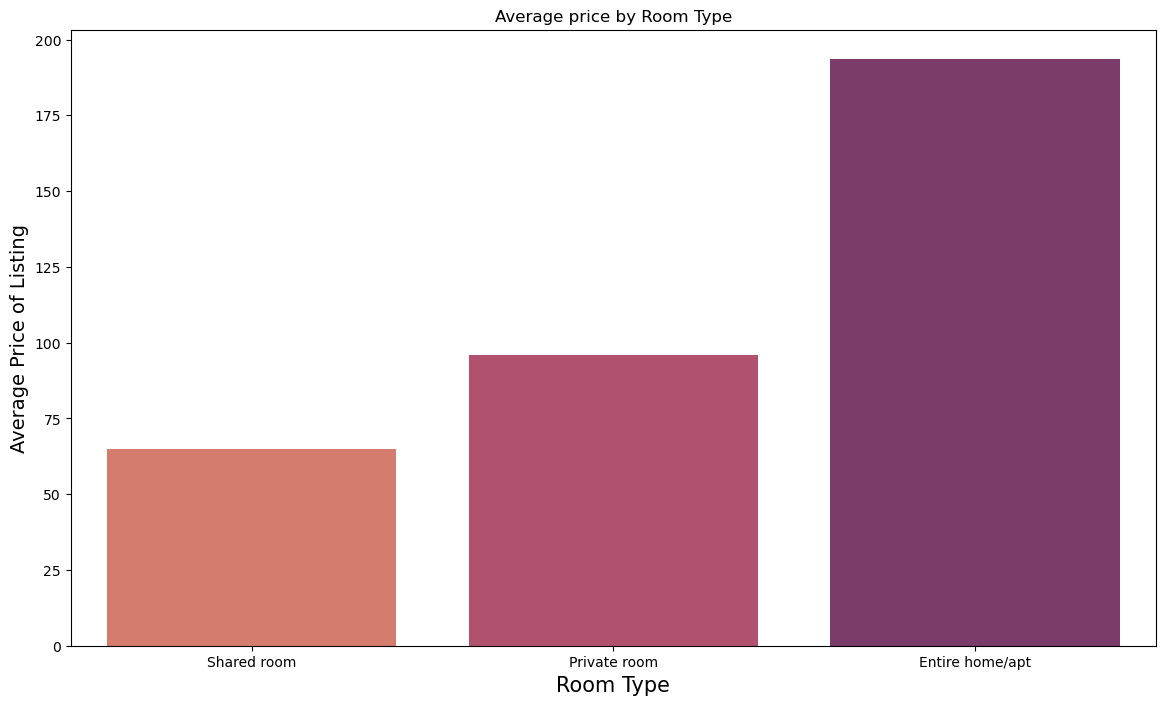

In [40]:
plt.figure(figsize=(14,8))
sns.barplot(x,y,palette='flare')
plt.title('Average price by Room Type')
plt.xlabel('Room Type',size=15)
plt.ylabel('Average Price of Listing',size=14)
plt.show()

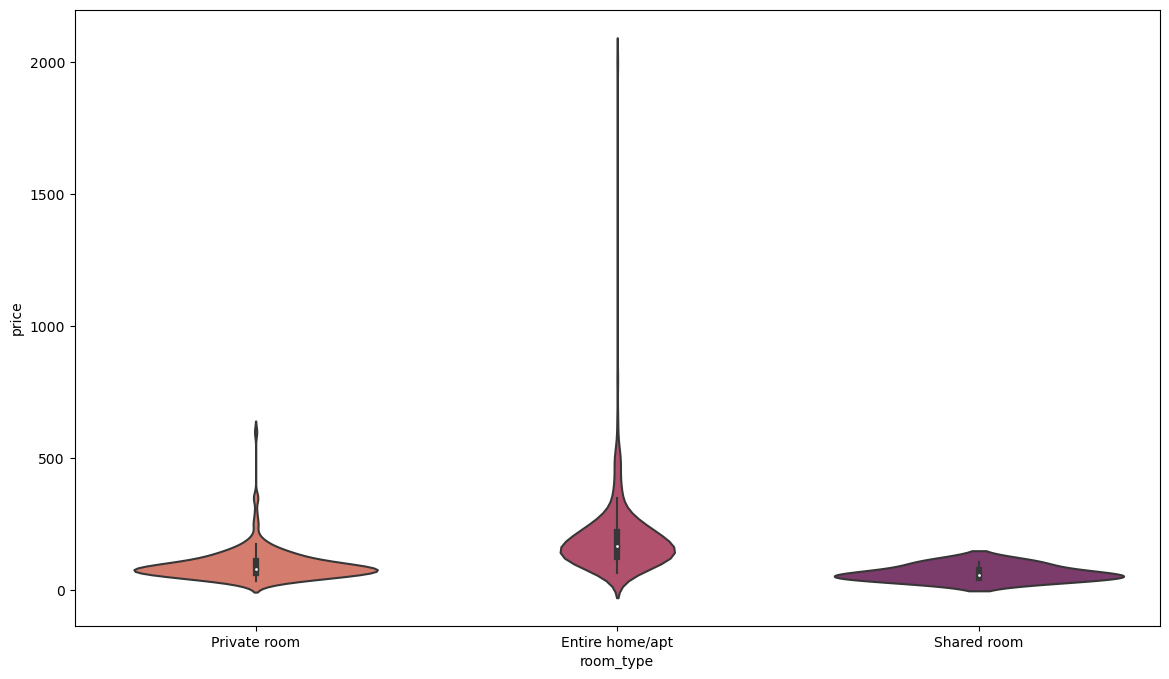

In [41]:
plt.figure(figsize=(14,8))
sns.violinplot(y = 'price', x = 'room_type', data = df,palette='flare')
plt.show()

#### The above violin chart impressively highlights the outliers in the price of the listings and help us see the extraordinary prices by room type

In [42]:
m=df.groupby('room_type')['calculated_host_listings_count'].sum()
m

room_type
Entire home/apt    444.0
Private room       586.0
Shared room          8.0
Name: calculated_host_listings_count, dtype: float64

In [43]:
x=m.keys()
y=m.values

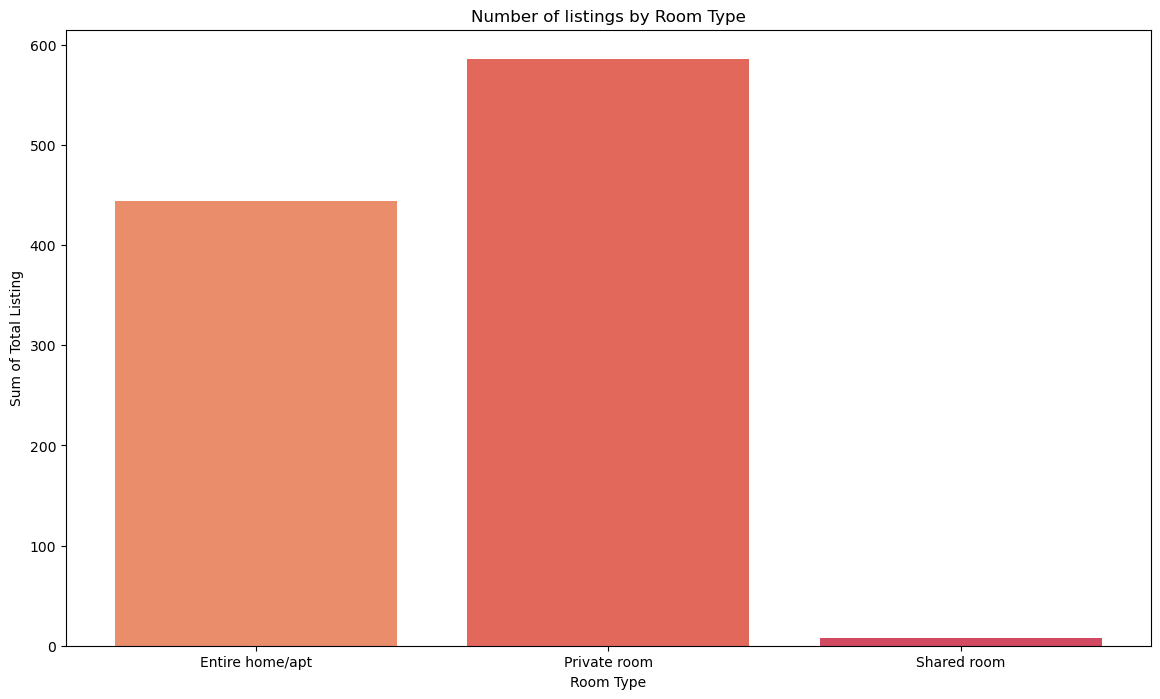

In [44]:
plt.figure(figsize=(14,8))
plt.bar(x,y,color=palette_color)
plt.title('Number of listings by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Sum of Total Listing')
plt.show()

In [45]:
#NYC boroughs shape file weblink---->https://data.cityofnewyork.us/City-Government/Borough-Boundaries/tqmj-j8zm

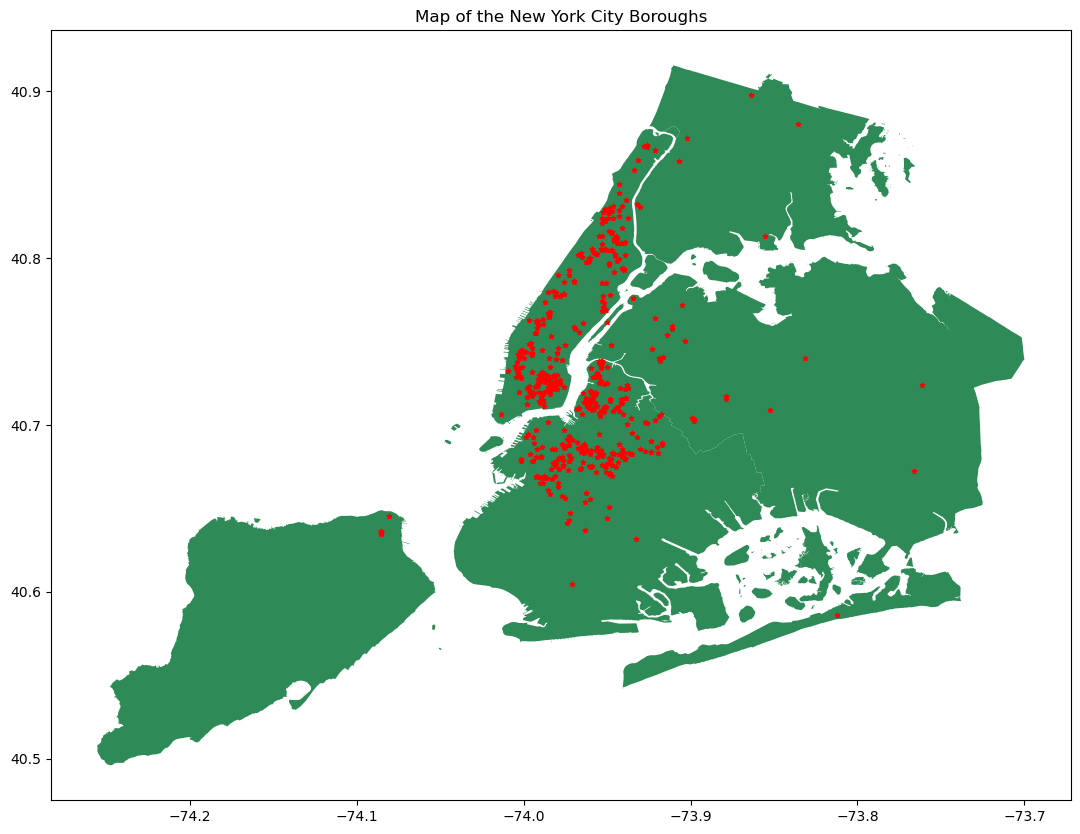

In [46]:
lo=df['longitude']
la=df['latitude']

nyc_map = gpd.read_file(r"E:\downloads\Borough Boundaries\geo_export_cf332423-7f62-4948-a9cd-e24de50b9f70.shp")
fig,ax = plt.subplots(figsize = (20,10))
nyc_map.plot(ax = ax,color='seagreen')
geometry = [Point(xy) for xy in zip(lo,la)]
geo_df = gpd.GeoDataFrame(geometry = geometry)
g = geo_df.plot(ax = ax, markersize = 12, color = 'red',marker = '*',label = df['neighbourhood'],legend=df['price'])
plt.title('Map of the New York City Boroughs')
plt.show()

### The above map is the map of the boroughs of the New York City and clearly shows us the spread of listings across NYC.

#### we can clearly see that most of the listings are in Manhattan and those in Brooklyn and Queens are also very closer to Manhattan itself thus this creates and oppourtunity for area with a few listing to like staten Island and Bronx to list more and attract more customers. 

In [47]:
u=df.groupby('neighbourhood_group')['calculated_host_listings_count'].sum().sort_values(ascending=False)
v=u.keys()
w=u.values
u

neighbourhood_group
Brooklyn         582.0
Manhattan        349.0
Queens            52.0
Bronx             30.0
Staten Island     25.0
Name: calculated_host_listings_count, dtype: float64

C:\Users\Dhruv\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


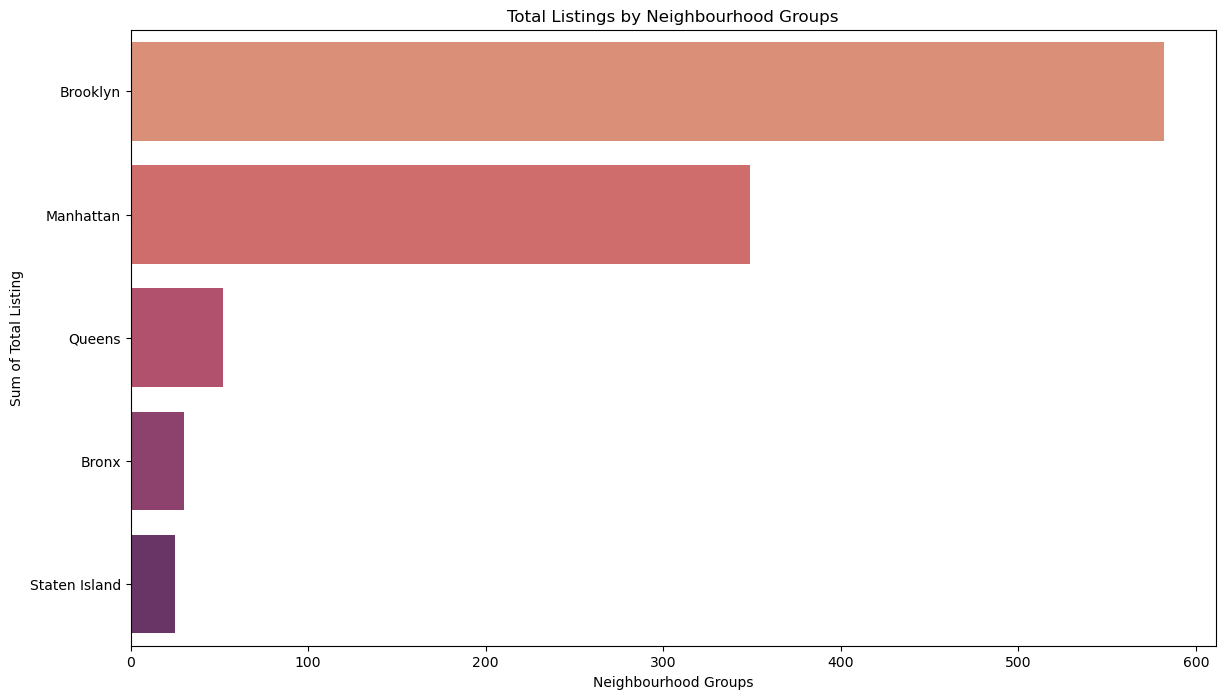

In [48]:
plt.figure(figsize=(14,8))
sns.barplot(w,v,orient='h',palette='flare')
plt.title('Total Listings by Neighbourhood Groups')
plt.xlabel('Neighbourhood Groups')
plt.ylabel('Sum of Total Listing')
plt.show()

(array([38237., 14038.,  8211.,  5574.,  4449.,  2058.,  1038.,   786.,
          920.,   339.]),
 array([  0.,  48.,  96., 144., 192., 240., 288., 336., 384., 432., 480.]),
 <BarContainer object of 10 artists>)

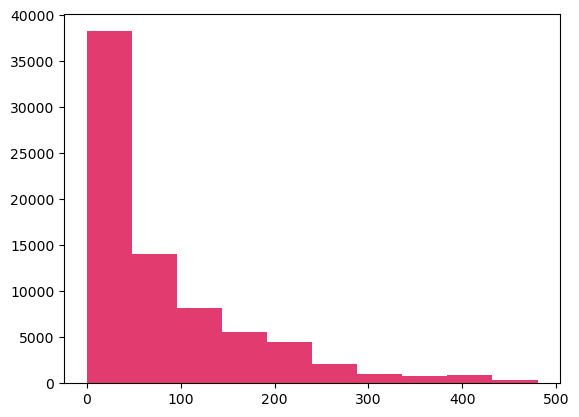

In [49]:
plt.hist(df['number_of_reviews'],weights=df['price'],color='#E23B70')


<AxesSubplot:xlabel='price', ylabel='minimum_nights'>

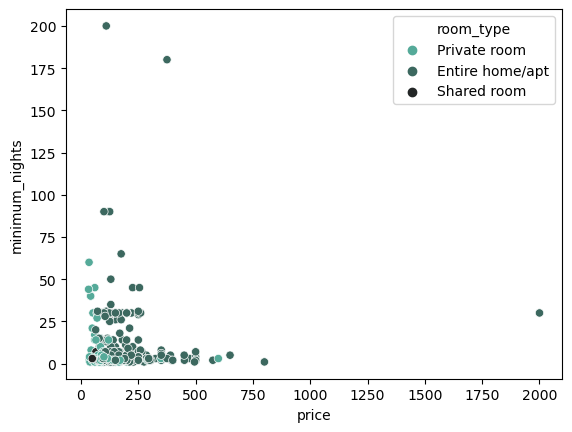

In [50]:
sns.scatterplot(y=df['minimum_nights'],x=df['price'],hue=df['room_type'],palette='dark:#5A9_r')

In [51]:
a=df.groupby('room_type')['availability_365'].mean()
b=a.keys()
c=a.values
a

room_type
Entire home/apt    165.531034
Private room       212.676617
Shared room        199.750000
Name: availability_365, dtype: float64

C:\Users\Dhruv\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


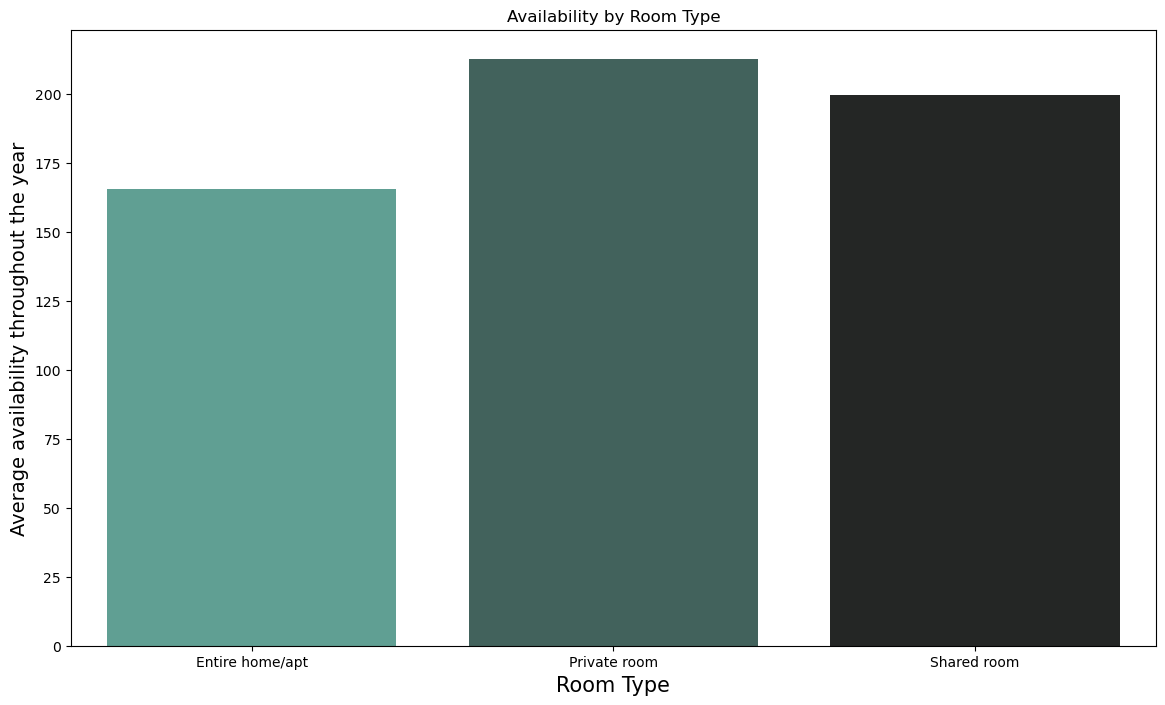

In [52]:
plt.figure(figsize=(14,8))
sns.barplot(b,c,palette='dark:#5A9_r')
plt.title('Availability by Room Type')
plt.xlabel('Room Type',size=15)
plt.ylabel('Average availability throughout the year',size=14)
plt.show()

#### Private Rooms are more readily available throughout the year as against Entire Apartments and homes.

In [53]:
a=df.groupby('neighbourhood_group')['availability_365'].mean()
b=a.keys()
c=a.values
a

neighbourhood_group
Bronx            325.285714
Brooklyn         169.262712
Manhattan        187.742222
Queens           261.545455
Staten Island    266.400000
Name: availability_365, dtype: float64

C:\Users\Dhruv\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


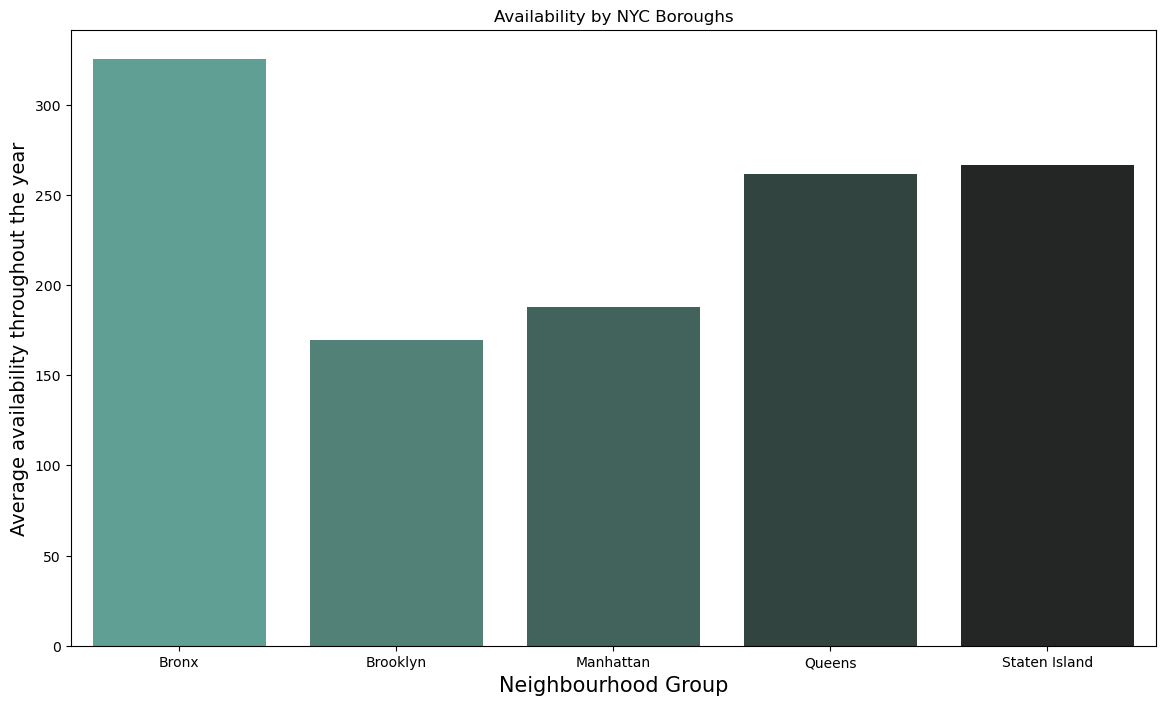

In [54]:
plt.figure(figsize=(14,8))
sns.barplot(b,c,palette='dark:#5A9_r')
plt.title('Availability by NYC Boroughs')
plt.xlabel('Neighbourhood Group',size=15)
plt.ylabel('Average availability throughout the year',size=14)
plt.show()

#### Bronx has a more average availability of rooms throughout the year but it does not have that many engagement and listings while Broolyn and Manhattan are more on the busier side and attract more listings.

In [55]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [56]:
df.drop(columns=['id', 'name', 'host_id', 'host_name',
       'neighbourhood','minimum_nights',  'last_review',
       'reviews_per_month','availability_365'],inplace=True)

In [57]:
df

,neighbourhood_group,latitude,longitude,room_type,price,number_of_reviews,calculated_host_listings_count
0,Brooklyn,40.64749,-73.97237,Private room,149.0,9.0,6.0
1,Manhattan,40.75362,-73.98377,Entire home/apt,225.0,45.0,2.0
2,Manhattan,40.80902,-73.94190,Private room,150.0,0.0,1.0
3,Brooklyn,40.68514,-73.95976,Entire home/apt,89.0,270.0,1.0
4,Manhattan,40.79851,-73.94399,Entire home/apt,80.0,9.0,1.0
...,...,...,...,...,...,...,...
494,Manhattan,40.73476,-73.98452,Entire home/apt,400.0,105.0,1.0
495,Brooklyn,40.69055,-73.92357,Entire home/apt,150.0,11.0,1.0
496,Manhattan,40.77350,-73.98697,Entire home/apt,2000.0,30.0,11.0
497,Brooklyn,40.67505,-73.95969,Entire home/apt,97.0,31.0,1.0


## Preprocessing Data

In [58]:
df=pd.get_dummies(df,columns=['neighbourhood_group'],drop_first=True)

In [59]:
df.columns

Index(['latitude', 'longitude', 'room_type', 'price', 'number_of_reviews',
       'calculated_host_listings_count', 'neighbourhood_group_Brooklyn',
       'neighbourhood_group_Manhattan', 'neighbourhood_group_Queens',
       'neighbourhood_group_Staten Island'],
      dtype='object')

In [60]:
from sklearn.preprocessing import StandardScaler,LabelEncoder

In [61]:
ss=StandardScaler()

In [62]:
lst=['latitude', 'longitude','number_of_reviews','calculated_host_listings_count',]
for i in lst:
    df[i]=ss.fit_transform(df[[i]])

In [63]:
le=LabelEncoder()
df['room_type']=le.fit_transform(df[['room_type']])

C:\Users\Dhruv\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [64]:
df

,latitude,longitude,room_type,price,number_of_reviews,calculated_host_listings_count,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island
0,-1.582974,-0.292718,1,149.0,-0.871828,1.226424,1,0,0,0
1,0.476140,-0.647280,0,225.0,-0.508482,-0.030470,0,1,0,0
2,1.551000,0.654958,1,150.0,-0.962665,-0.344694,0,1,0,0
3,-0.852496,0.099477,0,89.0,1.762436,-0.344694,1,0,0,0
4,1.347087,0.589955,0,80.0,-0.871828,-0.344694,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
494,0.110221,-0.670607,0,400.0,0.097096,-0.344694,0,1,0,0
495,-0.747532,1.225056,0,150.0,-0.851642,-0.344694,1,0,0,0
496,0.861847,-0.746806,0,2000.0,-0.659876,2.797542,0,1,0,0
497,-1.048260,0.101654,0,97.0,-0.649783,-0.344694,1,0,0,0


In [65]:
X=df.drop(columns=['price'])
Y=df['price']

### Model Preparation

In [66]:
from sklearn.model_selection import train_test_split,GridSearchCV

In [67]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.1,random_state=3)

### Hyper Parameter Tuning

In [68]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()

In [69]:
params={'criterion' : ['squared_error', 'friedman_mse', 'absolute_error','poisson'],
    'splitter':['best','random'],
    'max_depth':[2,3,4,5,6,7,8,9],
    'max_leaf_nodes': [2,3,4,5,6]}

In [70]:
grid=GridSearchCV(dt,param_grid=params,n_jobs=-1,cv=4)

In [71]:
grid.fit(x_train,y_train)

GridSearchCV(cv=4, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9],
                         'max_leaf_nodes': [2, 3, 4, 5, 6],
                         'splitter': ['best', 'random']})

In [72]:
score_data=pd.DataFrame(grid.cv_results_)

In [73]:
score_data.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_leaf_nodes,param_splitter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003906,0.006765,0.003904,0.006762,squared_error,2,2,best,"{'criterion': 'squared_error', 'max_depth': 2,...",-0.346121,0.077190,-0.182040,-0.039528,-0.122625,0.158360,140
1,0.010816,0.006416,0.003905,0.006763,squared_error,2,2,random,"{'criterion': 'squared_error', 'max_depth': 2,...",0.119984,0.077190,0.033350,-0.072177,0.039586,0.071428,89
2,0.007808,0.007808,0.003906,0.006766,squared_error,2,3,best,"{'criterion': 'squared_error', 'max_depth': 2,...",-5.297373,0.081827,0.020451,-0.039528,-1.308656,2.303287,309
3,0.007811,0.007811,0.003905,0.006763,squared_error,2,3,random,"{'criterion': 'squared_error', 'max_depth': 2,...",-2.657166,0.081827,0.218083,0.158713,-0.549636,1.217742,248
4,0.003905,0.006764,0.007811,0.007811,squared_error,2,4,best,"{'criterion': 'squared_error', 'max_depth': 2,...",-5.107109,0.104013,0.264065,0.316879,-1.105538,2.311637,302


In [74]:
score_data.nlargest(5,'mean_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_leaf_nodes,param_splitter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
39,0.006132,0.006195,0.001235,0.002140,squared_error,5,6,random,"{'criterion': 'squared_error', 'max_depth': 5,...",0.215544,0.186958,0.296418,0.319295,0.254554,0.054852,1
159,0.003905,0.006764,0.003905,0.006764,friedman_mse,9,6,random,"{'criterion': 'friedman_mse', 'max_depth': 9, ...",0.258833,0.091640,0.265780,0.355395,0.242912,0.095279,2
6,0.006882,0.004225,0.002319,0.003315,squared_error,2,5,best,"{'criterion': 'squared_error', 'max_depth': 2,...",0.212384,0.104013,0.264065,0.316879,0.224335,0.078681,3
8,0.007432,0.002985,0.003054,0.002623,squared_error,2,6,best,"{'criterion': 'squared_error', 'max_depth': 2,...",0.212384,0.104013,0.264065,0.316879,0.224335,0.078681,3
24,0.000000,0.000000,0.007813,0.007813,squared_error,4,4,best,"{'criterion': 'squared_error', 'max_depth': 4,...",0.212384,0.104013,0.264065,0.316879,0.224335,0.078681,3


In [75]:
dt=DecisionTreeRegressor(criterion='friedman_mse',splitter='random',max_depth=7,max_leaf_nodes=6,random_state=3)

In [76]:
dt.fit(x_train,y_train)

DecisionTreeRegressor(criterion='friedman_mse', max_depth=7, max_leaf_nodes=6,
                      random_state=3, splitter='random')

In [77]:
y_predict=dt.predict(x_test)
y_predict

array([154.56804734, 154.56804734, 154.56804734, 154.56804734,
       154.56804734, 154.56804734, 154.56804734, 154.56804734,
       154.56804734, 154.56804734, 154.56804734, 154.56804734,
       154.56804734, 154.56804734, 154.56804734, 154.56804734,
       154.56804734, 125.74468085, 154.56804734, 154.56804734,
       154.56804734, 154.56804734, 154.56804734, 154.56804734,
       154.56804734, 154.56804734, 154.56804734, 125.74468085,
       125.74468085, 154.56804734, 125.74468085, 125.74468085,
       154.56804734, 311.        , 125.74468085, 154.56804734,
       154.56804734, 154.56804734, 154.56804734, 154.56804734,
       154.56804734, 154.56804734, 154.56804734, 154.56804734,
       125.74468085, 154.56804734, 154.56804734, 154.56804734,
       154.56804734, 154.56804734])

In [78]:
print('Accuracy of training data',dt.score(x_train,y_train))

Accuracy of training data 0.48090038415437575


In [79]:
print('Accuracy of testing data',dt.score(x_test,y_test))

Accuracy of testing data 0.08263353012607821


### Alternate Model No. 1

In [80]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor()

In [81]:
params={'n_neighbors':[3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25],'p':[1,2]}

In [82]:
grid=GridSearchCV(knn,param_grid=params,cv=3,n_jobs=-1)

In [83]:
grid.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid={'n_neighbors': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                         14, 15, 16, 17, 18, 19, 20, 21, 22, 23,
                                         24, 25],
                         'p': [1, 2]})

In [84]:
score_data=pd.DataFrame(grid.cv_results_)

In [85]:
score_data.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,param_p,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.005469,0.000774,0.002005,0.002836,3,1,"{'n_neighbors': 3, 'p': 1}",0.103741,0.022186,0.020981,0.048969,0.038733,42
1,0.003295,0.004660,0.007096,0.004660,3,2,"{'n_neighbors': 3, 'p': 2}",0.065214,-0.674391,0.058836,-0.183447,0.347159,46
2,0.002006,0.002837,0.004676,0.003405,4,1,"{'n_neighbors': 4, 'p': 1}",0.067921,0.122794,-0.059717,0.043666,0.076458,43
3,0.004695,0.004314,0.003500,0.001583,4,2,"{'n_neighbors': 4, 'p': 2}",0.052840,-0.239985,0.044316,-0.047610,0.136075,45
4,0.001540,0.002177,0.000000,0.000000,5,1,"{'n_neighbors': 5, 'p': 1}",0.059496,0.117755,0.048908,0.075386,0.030270,40


In [86]:
score_data.nlargest(5,'mean_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,param_p,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
23,0.004683,0.003886,0.005807,0.006978,14,2,"{'n_neighbors': 14, 'p': 2}",0.058260,0.287567,0.287343,0.211057,0.108044,1
21,0.001009,0.001427,0.005207,0.007364,13,2,"{'n_neighbors': 13, 'p': 2}",0.055760,0.272444,0.292744,0.206983,0.107251,2
19,0.006309,0.008922,0.006217,0.006764,12,2,"{'n_neighbors': 12, 'p': 2}",0.058928,0.273819,0.278230,0.203659,0.102356,3
25,0.000600,0.000848,0.003171,0.004485,15,2,"{'n_neighbors': 15, 'p': 2}",0.058355,0.274023,0.276606,0.202995,0.102281,4
27,0.014828,0.003249,0.001018,0.001439,16,2,"{'n_neighbors': 16, 'p': 2}",0.052638,0.265162,0.273947,0.197249,0.102318,5


In [87]:
knn=KNeighborsRegressor(n_neighbors=13)

In [88]:
knn.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=13)

In [89]:
print('Accuracy of training data',knn.score(x_train,y_train))

Accuracy of training data 0.30008148672435253


In [90]:
print('Accuracy of testing data',knn.score(x_test,y_test))

Accuracy of testing data 0.49681069694874136


### Alternate Model No. 2

In [91]:
from sklearn.linear_model import LinearRegression

lr=LinearRegression()

lr.fit(x_train,y_train)

y_pred=lr.predict(x_test)

print(lr.score(x_train,y_train))

print(lr.score(x_test,y_test))

0.2537096342000208
0.4969652302971569


## The Conclusion

#### We can clearly see after all the three model preparation and testing that we are getting a low training accuracy and a higher test accuracy which is the case of model underfitting. This means that our model is not learning enough from the data that is present with us. Thus underfitting is a situation that arises when there is high bias and low or high variance in the data.

#### Thus we need to either provid ethe model with more data to learn from. One alternative can be to provide more features to the model or make the model more complex in itself.